# 臺20 明霸克露橋

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
import sklearn
import sklearn.mixture
import sklearn.naive_bayes # 貝氏分類模組
import sklearn.cluster # 分群

In [2]:
def show_(img, h=6, w=10):
    img = img.astype(np.uint8)
    plt.figure(figsize=(w, h))
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, vmin=0, vmax=255)
    else:
        print('B & W')
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]), plt.yticks([])
    plt.show()

def bgr_hist(bgr):
    for lst in [[0, 1], [0, 2], [1, 2]]:
        hist = cv2.calcHist([bgr], lst, None, [256, 256], [0, 256, 0, 256])
        plt.imshow(np.log(hist + 1.0), cmap=matplotlib.cm.hot)
        plt.show()

def ML_color_split(img):
    h, w = img.shape[:2]
    # 取hls色彩空間
    img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS_FULL)
    # 高斯濾鏡
    img_gs = cv2.GaussianBlur(img_hls, (3, 3), 0)
    # 資料少一點
    img_mini = cv2.resize(img_gs, (w // 20, h // 20))
    # 凝聚分類
    X = img_mini.reshape(-1, 3)
    agg = sklearn.cluster.AgglomerativeClustering(n_clusters=2)
    Y = agg.fit_predict(X)
    # 正規化
    scale = sklearn.preprocessing.StandardScaler()
    X = scale.fit_transform(X)
    # SVM 取出分類
    svm = sklearn.svm.SVC(kernel='rbf').fit(X, Y)
    data_norm = scale.transform(img_hls.reshape(-1, 3))
    mask = np.uint8(svm.predict(data_norm)).reshape((h, w))
    show_(img)
    plt.figure(figsize=(10, 6))
    plt.imshow(mask, cmap=matplotlib.cm.Blues_r)
    plt.xticks([]), plt.yticks([])
    return mask

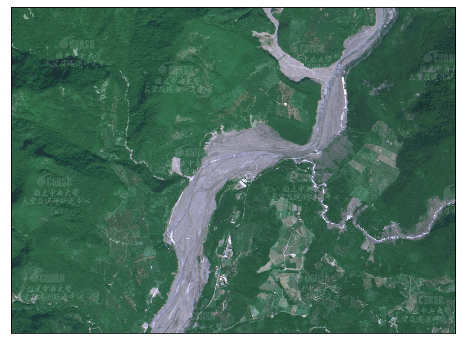

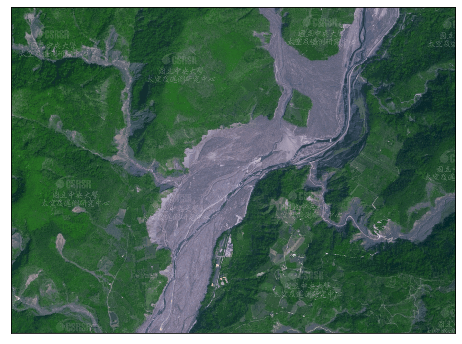

In [3]:
img = cv2.imread('t20.png')
d = 914
h, w = 660, 900
x, y = 90, 300

img1 = img[y:y+h, x:x+w]
img2 = img[y:y+h, x+d:x+d+w]

show_(img1)
show_(img2)

In [4]:
img1_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img1_hls = cv2.cvtColor(img1, cv2.COLOR_BGR2HLS_FULL)

img1_gs = cv2.GaussianBlur(img1_hls, (3, 3), 0)
img1_mini = cv2.resize(img1_gs, (w // 20, h // 20))


In [5]:
X = img1_mini.reshape(-1, 3)
agg = sklearn.cluster.AgglomerativeClustering(n_clusters=2)
Y = agg.fit_predict(X)

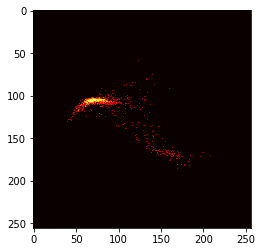

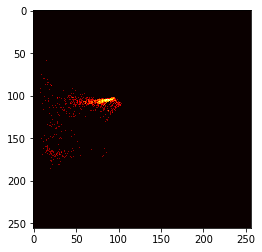

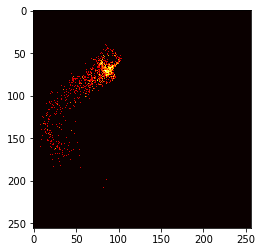

In [6]:
bgr_hist(img1_mini)

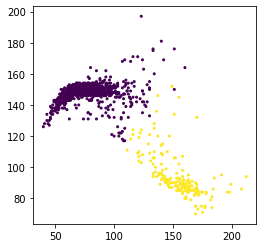

In [7]:
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 1], -X[:, 0], c=Y, s=4)

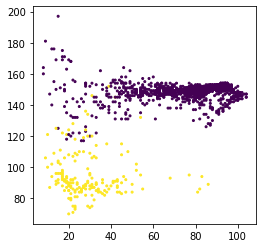

In [8]:
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 2], -X[:, 0], c=Y, s=4)

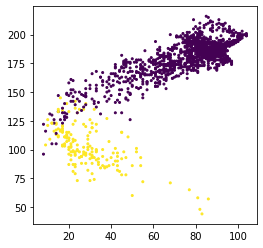

In [9]:
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 2], -X[:, 1], c=Y, s=4)

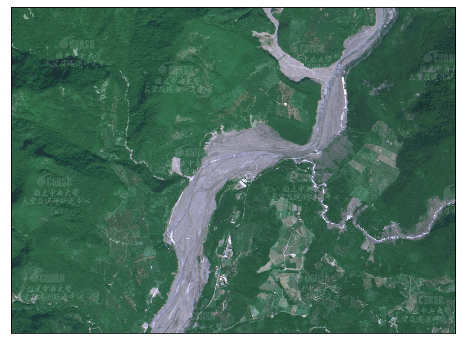

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

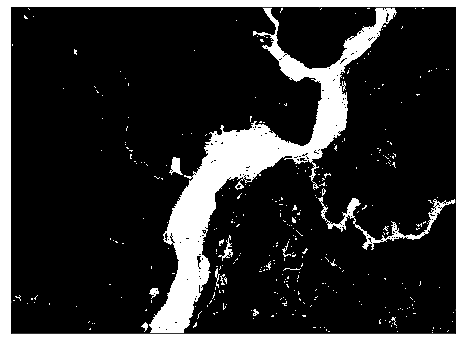

In [10]:
scale = sklearn.preprocessing.StandardScaler()
X = scale.fit_transform(X)
# SVM 取出分類
svm = sklearn.svm.SVC(kernel='rbf').fit(X, Y)
data_norm = scale.transform(img1_hls.reshape(-1, 3))
mask = np.uint8(svm.predict(data_norm)).reshape((h, w))

show_(img1)
plt.figure(figsize=(10, 6))
plt.imshow(mask, cmap='gray')
plt.xticks([]), plt.yticks([])

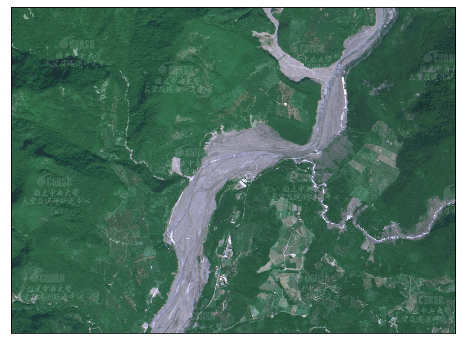

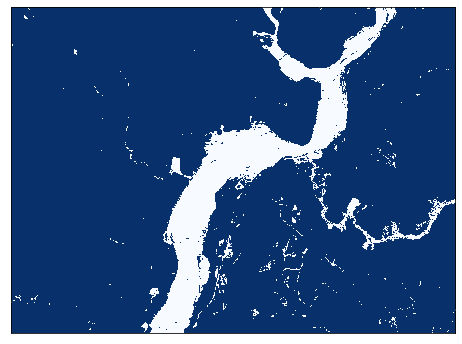

In [11]:
mask1 = ML_color_split(img1)

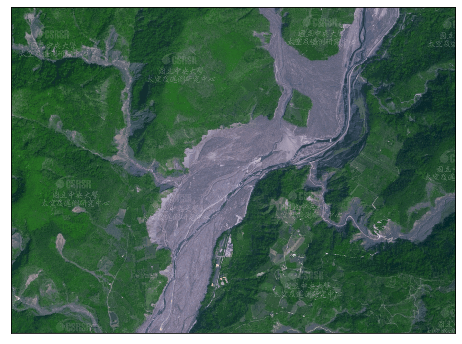

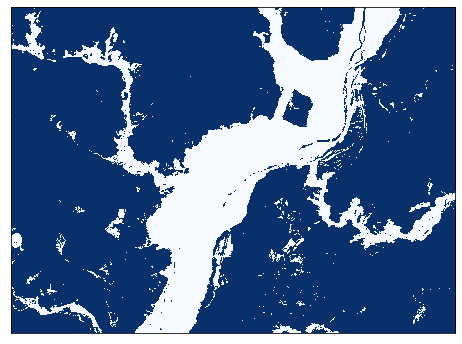

In [12]:
mask2 = ML_color_split(img2)

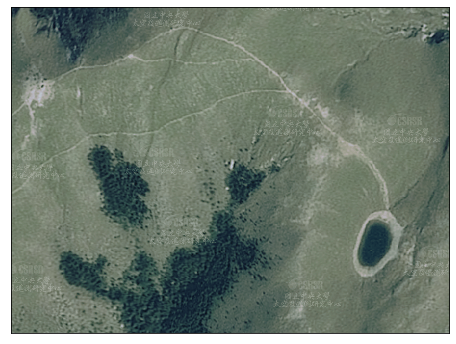

B & W


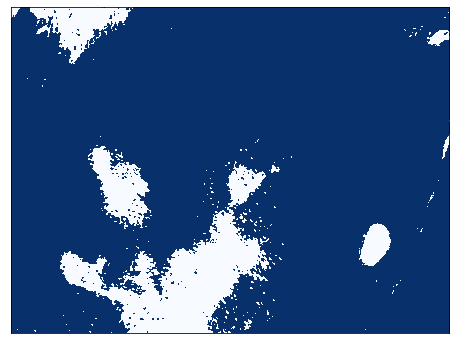

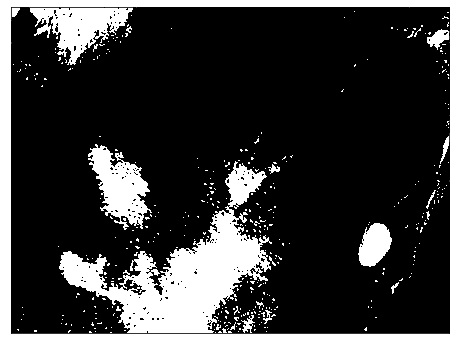

In [13]:
lark = cv2.imread('lark.png')
mask = ML_color_split(lark)
lark = cv2.imread('lark.png', 0)
show_(cv2.threshold(lark, 80, 255, cv2.THRESH_BINARY_INV)[1])

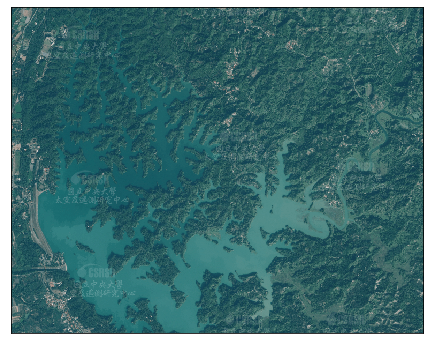

B & W


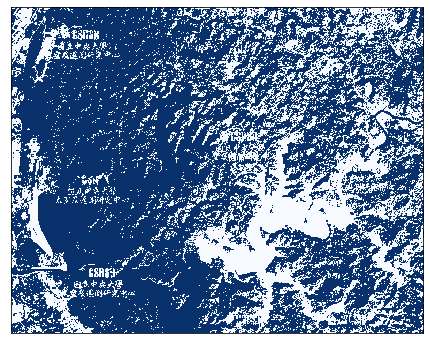

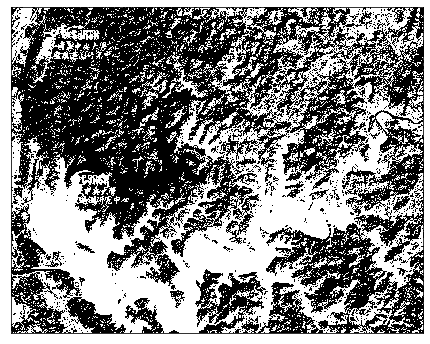

In [14]:
lark = cv2.imread('lark2.png')
mask = ML_color_split(lark)
lark = cv2.imread('lark2.png', 0 )
show_(cv2.threshold(lark, 80, 255, cv2.THRESH_BINARY)[1])